**Neural Network model**

Loading the required packages

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#IMPORTING THE IMDB DATASET
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Preparing the data**

Encoding the integer sequences via multi-hot encoding

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Model 1- Hidden layers= 2, Nodes=16**

Model definition

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [5]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

**setting up the validation set and training set**

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1723 - accuracy: 0.7877 - val_loss: 0.1219 - val_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0969 - accuracy: 0.8877 - val_loss: 0.0931 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0718 - accuracy: 0.9147 - val_loss: 0.0856 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0555 - accuracy: 0.9329 - val_loss: 0.0917 - val_accuracy: 0.8751
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0471 - accuracy: 0.9431 - val_loss: 0.0861 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0378 - accuracy: 0.9577 - val_loss: 0.0971 - val_accuracy: 0.8697
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0341 - accuracy: 0.9610 - val_loss: 0.0884 - val_accuracy: 0.8826
Epoch 8/20
30

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

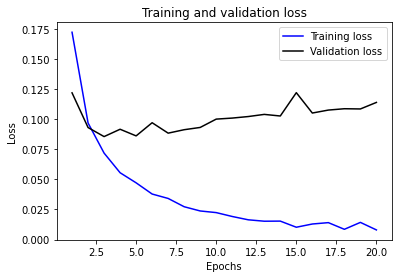

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "blue", label="Training loss")
plt.plot(epochs, val_loss_values, "black", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

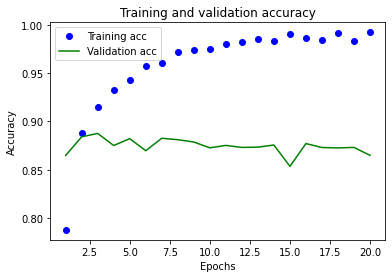

In [10]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "green", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch with epochs=4**

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1464 - accuracy: 0.8148
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0792 - accuracy: 0.9009
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0612 - accuracy: 0.9222
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0859 - accuracy: 0.8838


In [12]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.0859 - accuracy: 0.8838


**The first model built had an accuracy on the test set of 88.38%.**

**Using a trained model to make forecasts based on new data**

In [13]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.06563252],
       [0.9979722 ],
       [0.62655854],
       ...,
       [0.08908485],
       [0.05144303],
       [0.63655424]], dtype=float32)

**MODEL 2 - 1 hidden layer 64 nodes**

In [14]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history2 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 57ms/step - loss: 0.1692 - accuracy: 0.7619 - val_loss: 0.1267 - val_accuracy: 0.8407
Epoch 2/50
30/30 [==============================] - 1s 36ms/step - loss: 0.0994 - accuracy: 0.8863 - val_loss: 0.0954 - val_accuracy: 0.8819
Epoch 3/50
30/30 [==============================] - 1s 35ms/step - loss: 0.0781 - accuracy: 0.9084 - val_loss: 0.0927 - val_accuracy: 0.8763
Epoch 4/50
30/30 [==============================] - 1s 35ms/step - loss: 0.0683 - accuracy: 0.9183 - val_loss: 0.0868 - val_accuracy: 0.8840
Epoch 5/50
30/30 [==============================] - 1s 40ms/step - loss: 0.0588 - accuracy: 0.9283 - val_loss: 0.0833 - val_accuracy: 0.8873
Epoch 6/50
30/30 [==============================] - 2s 55ms/step - loss: 0.0535 - accuracy: 0.9351 - val_loss: 0.0915 - val_accuracy: 0.8764
Epoch 7/50
30/30 [==============================] - 1s 49ms/step - loss: 0.0492 - accuracy: 0.9422 - val_loss: 0.0838 - val_accuracy: 0.8853
Epoch 8/50
30

In [15]:
history_dict_2 = history2.history

**Plotting the training and validation loss**

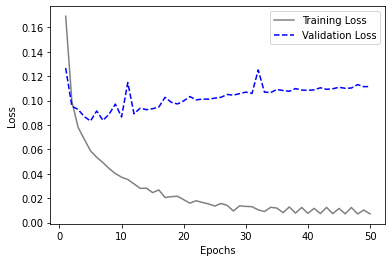

In [16]:
loss = history_dict_2['loss']
val_loss = history_dict_2['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color= "grey", label= "Training Loss")
plt.plot(epochs, val_loss, color= "blue",linestyle= "dashed", label= "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Based on the loss graph above, we can conclude that "3" is the right number of epochs because the validation loss starts to rise after the third epoch.


**Plotting the training and validation accuracy** 

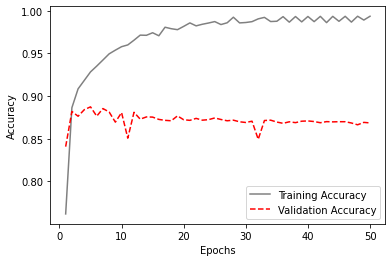

In [17]:
accuracy = history_dict_2['accuracy']
validation_accuracy = history_dict_2['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color="grey",label="Training Accuracy")
plt.plot(epochs,validation_accuracy, color= "RED", linestyle="dashed",label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can indicate from the accuracy graph that epoch=3 had the greatest accuracy.

**Retraining a model from scratch with epochs=3**

In [18]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_3 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512) 

Epoch 1/3
49/49 [==============================] - 2s 27ms/step - loss: 0.1449 - accuracy: 0.8019
Epoch 2/3
49/49 [==============================] - 1s 26ms/step - loss: 0.0852 - accuracy: 0.8926
Epoch 3/3
49/49 [==============================] - 1s 27ms/step - loss: 0.0714 - accuracy: 0.9088


In [19]:
results2= model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.0834 - accuracy: 0.8870


**The second model built had an accuracy on the test set of 88.70%.**


**Using a trained model to generate predictions on new data**

In [20]:

model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.25438038],
       [0.9994113 ],
       [0.92979574],
       ...,
       [0.1266982 ],
       [0.12051606],
       [0.5660707 ]], dtype=float32)

 **MODEL 3 - 3 hidden layer 64 nodes**

In [21]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data = (x_val,y_val))


Epoch 1/50
30/30 [==============================] - 3s 64ms/step - loss: 0.7639 - accuracy: 0.7273 - val_loss: 0.5619 - val_accuracy: 0.8627
Epoch 2/50
30/30 [==============================] - 2s 64ms/step - loss: 0.5020 - accuracy: 0.8809 - val_loss: 0.5527 - val_accuracy: 0.8453
Epoch 3/50
30/30 [==============================] - 1s 37ms/step - loss: 0.4149 - accuracy: 0.9031 - val_loss: 0.4612 - val_accuracy: 0.8762
Epoch 4/50
30/30 [==============================] - 1s 39ms/step - loss: 0.3484 - accuracy: 0.9301 - val_loss: 0.4756 - val_accuracy: 0.8721
Epoch 5/50
30/30 [==============================] - 1s 38ms/step - loss: 0.3150 - accuracy: 0.9349 - val_loss: 0.4625 - val_accuracy: 0.8748
Epoch 6/50
30/30 [==============================] - 1s 38ms/step - loss: 0.2845 - accuracy: 0.9469 - val_loss: 0.5240 - val_accuracy: 0.8540
Epoch 7/50
30/30 [==============================] - 1s 41ms/step - loss: 0.2555 - accuracy: 0.9560 - val_loss: 0.4853 - val_accuracy: 0.8707
Epoch 8/50
30

In [22]:
history_dict_3 = history3.history

**plotting the training and validation loss**

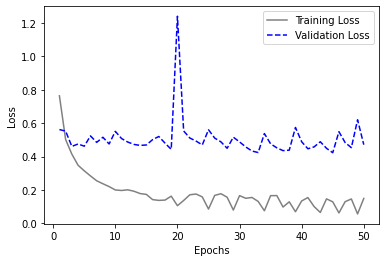

In [23]:
loss = history_dict_3['loss']
val_loss = history_dict_3['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='BLUE',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on the loss graph above, we can conclude that "3" is the right number of epochs because the validation loss starts to rise after the third epoch.

**plotting the training and validation accuracy**

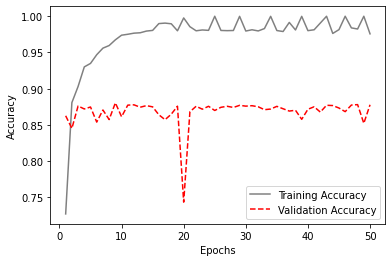

In [24]:
accuracy = history_dict_3['accuracy']
val_accuracy = history_dict_3['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='RED',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the 3rd epoch.

**Retraining a model from scratch with epochs=3**

In [25]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_D3 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)

Epoch 1/3
49/49 [==============================] - 3s 35ms/step - loss: 0.6697 - accuracy: 0.7923
Epoch 2/3
49/49 [==============================] - 2s 31ms/step - loss: 0.4425 - accuracy: 0.8908
Epoch 3/3
49/49 [==============================] - 1s 27ms/step - loss: 0.3665 - accuracy: 0.9093


In [26]:
results3= model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.4236 - accuracy: 0.8791


**The third model built had an accuracy on the test set of 87.91%.**


**Using a trained model to generate predictions on new data**

In [27]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.14068909],
       [0.99819803],
       [0.80112803],
       ...,
       [0.07001937],
       [0.05416632],
       [0.43410236]], dtype=float32)

**Model-4 - 2 hidden layer 64 nodes**

In [28]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=256,
                       validation_data=(x_val,y_val))

Epoch 1/50
59/59 [==============================] - 3s 34ms/step - loss: 0.4993 - accuracy: 0.7623 - val_loss: 0.3148 - val_accuracy: 0.8768
Epoch 2/50
59/59 [==============================] - 2s 26ms/step - loss: 0.2934 - accuracy: 0.8892 - val_loss: 0.2836 - val_accuracy: 0.8855
Epoch 3/50
59/59 [==============================] - 2s 35ms/step - loss: 0.2194 - accuracy: 0.9186 - val_loss: 0.2802 - val_accuracy: 0.8881
Epoch 4/50
59/59 [==============================] - 2s 36ms/step - loss: 0.1701 - accuracy: 0.9383 - val_loss: 0.2988 - val_accuracy: 0.8834
Epoch 5/50
59/59 [==============================] - 2s 29ms/step - loss: 0.1346 - accuracy: 0.9543 - val_loss: 0.3188 - val_accuracy: 0.8871
Epoch 6/50
59/59 [==============================] - 1s 23ms/step - loss: 0.1043 - accuracy: 0.9651 - val_loss: 0.3864 - val_accuracy: 0.8832
Epoch 7/50
59/59 [==============================] - 1s 23ms/step - loss: 0.0843 - accuracy: 0.9705 - val_loss: 0.4090 - val_accuracy: 0.8833
Epoch 8/50
59

In [29]:
history_dict_4 = history4.history

**plotting the training and validation loss**

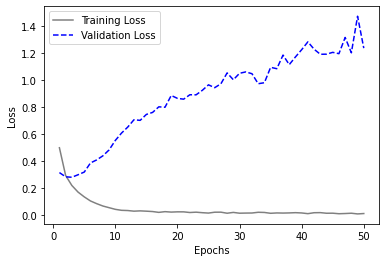

In [30]:
loss = history_dict_4['loss']
val_loss = history_dict_4['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on the loss graph above, we can conclude that "3" is the right number of epochs because the validation loss starts to rise after the third epoch.

**plotting the training and validation accuracy**

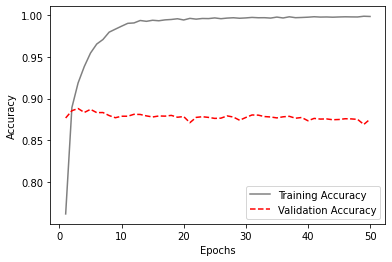

In [31]:
accuracy = history_dict_4['accuracy']
val_accuracy = history_dict_4['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='red',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the third epoch.

**Retraining the model with 3 epochs**

In [32]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history5 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=256)

Epoch 1/3
98/98 [==============================] - 3s 18ms/step - loss: 0.4460 - accuracy: 0.7940
Epoch 2/3
98/98 [==============================] - 2s 17ms/step - loss: 0.2672 - accuracy: 0.8987
Epoch 3/3
98/98 [==============================] - 2s 18ms/step - loss: 0.2082 - accuracy: 0.9237


In [33]:
results4 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3169 - accuracy: 0.8718


**The fourth model built had an accuracy on the test set of 87.18%**

**Model 5 - Hidden layers=1, Nodes=32**

In [34]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history6 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 2s 46ms/step - loss: 0.1578 - accuracy: 0.7946 - val_loss: 0.1093 - val_accuracy: 0.8728
Epoch 2/50
30/30 [==============================] - 1s 26ms/step - loss: 0.0813 - accuracy: 0.9117 - val_loss: 0.0902 - val_accuracy: 0.8898
Epoch 3/50
30/30 [==============================] - 1s 33ms/step - loss: 0.0602 - accuracy: 0.9381 - val_loss: 0.0851 - val_accuracy: 0.8888
Epoch 4/50
30/30 [==============================] - 1s 36ms/step - loss: 0.0482 - accuracy: 0.9530 - val_loss: 0.0841 - val_accuracy: 0.8863
Epoch 5/50
30/30 [==============================] - 1s 34ms/step - loss: 0.0390 - accuracy: 0.9651 - val_loss: 0.0833 - val_accuracy: 0.8860
Epoch 6/50
30/30 [==============================] - 1s 26ms/step - loss: 0.0325 - accuracy: 0.9728 - val_loss: 0.0848 - val_accuracy: 0.8818
Epoch 7/50
30/30 [==============================] - 1s 25ms/step - loss: 0.0270 - accuracy: 0.9799 - val_loss: 0.0858 - val_accuracy: 0.8817
Epoch 8/50
30

In [35]:
history_dict_5=history6.history

**plotting the training and validation loss**

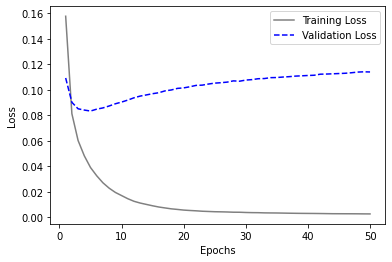

In [36]:
loss = history_dict_5['loss']
val_loss = history_dict_5['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='blue',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Since the validation loss starts to increase after the fifth epoch, we can assume the right number of epochs to be "5" from the loss curve above.

**plotting the training and validation accuracy**

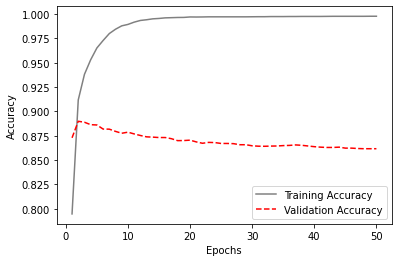

In [37]:
accuracy = history_dict_5['accuracy']
val_accuracy = history_dict_5['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='red',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the fifth epoch.

**Retraining the model with 5 epochs**

In [38]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history7 = model.fit(x_train,
                       y_train,
                       epochs=5,
                       batch_size=512)

Epoch 1/5
49/49 [==============================] - 2s 24ms/step - loss: 0.1383 - accuracy: 0.8268
Epoch 2/5
49/49 [==============================] - 1s 21ms/step - loss: 0.0734 - accuracy: 0.9154
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0566 - accuracy: 0.9368
Epoch 4/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0463 - accuracy: 0.9505
Epoch 5/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0389 - accuracy: 0.9593


In [39]:
results5 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.0918 - accuracy: 0.8752


**The fifth built model's accuracy on the test set was 87.52%**


**Using a trained model to generate predictions on new data**

In [40]:

model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.1131032 ],
       [0.999339  ],
       [0.7180885 ],
       ...,
       [0.15593083],
       [0.08106496],
       [0.49401113]], dtype=float32)

***Evaluating the performance of Five different neural network models trained on the IMDB dataset ***

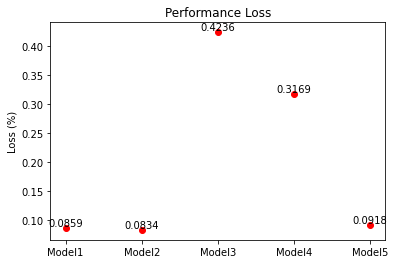

In [43]:
loss_dict = {'Model1': 0.0859, 'Model2': 0.0834, 'Model3': 0.4236, 'Model4': 0.3169,
             'Model5': 0.0918}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='red')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()

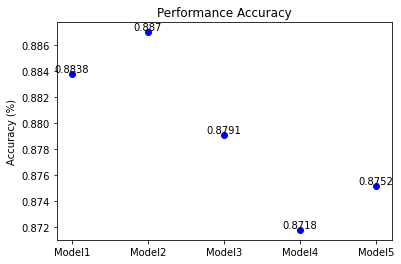

In [44]:
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model1': 0.8838, 'Model2': 0.8870, 'Model3': 0.8791, 'Model4': 0.8718,
            'Model5': 0.8752}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='blue')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()